In [3]:
import pandas as pd
import seaborn as sns

In [24]:
df = pd.read_csv("data/final_data.csv")
df

,Tm,Year,Date,Home,Opp,Week,G#,Day,Result,Tm_1stD,...,Tm_QBRating,Tm_TotYds,Tm_Plys,Tm_Y/P_y,Tm_DPlys,Tm_DY/P,Tm_TO,Tm_TOP,Tm_Gametime,Spread
0,NOR,2013,2013-11-10 08:30:00,1,DAL,10,9,Sun,W 49-17,40,...,139.0,625.0,80.0,7.8,43.0,4.5,1.0,39:32:00,3:13,32
1,DEN,2013,2013-12-08 04:05:00,1,TEN,14,13,Sun,W 51-28,39,...,107.8,551.0,91.0,6.1,48.0,5.3,NaN,39:20:00,3:17,23
2,HOU,2012,2012-11-18 01:03:00,1,JAX,11,10,Sun,W 43-37,39,...,121.7,653.0,92.0,7.1,66.0,6.9,3.0,41:40:00,3:49,6
3,DET,2012,2012-09-23 01:03:00,0,TEN,3,3,Sun,L 41-44,36,...,118.9,583.0,92.0,6.3,61.0,7.2,1.0,40:36:00,3:51,-3
4,KAN,2004,2004-10-24 01:00:00,1,ATL,7,6,Sun,W 56-10,36,...,101.6,540.0,77.0,7.0,50.0,4.4,1.0,38:54:00,3:05,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11460,NYJ,2021,2022-01-09 01:00:00,0,BUF,18,17,Sun,L 10-27,4,...,66.0,53.0,46.0,1.2,79.0,5.4,NaN,23:00,3:11,-17
11461,HOU,2002,2002-12-08 01:01:00,0,PIT,14,13,Sun,W 24-6,3,...,40.8,47.0,40.0,1.2,95.0,4.4,1.0,20:19,3:09,18
11462,MIN,2006,2006-12-21 08:05:00,0,GNB,16,15,Thu,L 7-9,3,...,35.4,104.0,45.0,2.3,76.0,4.2,1.0,25:21:00,3:08,-2
11463,OAK,2008,2008-11-02 04:15:00,1,ATL,9,8,Sun,L 0-24,3,...,19.0,77.0,34.0,2.3,82.0,5.5,2.0,14:45,2:40,-24


<AxesSubplot:>

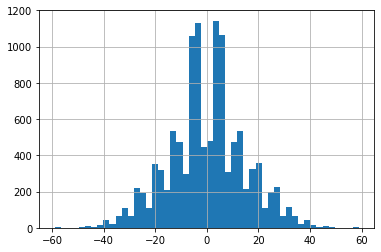

In [25]:
df.Spread.hist(bins=50)

In [27]:
df.columns

Index(['Tm', 'Year', 'Date', 'Home', 'Opp', 'Week', 'G#', 'Day', 'Result',
       'Tm_1stD', 'Tm_Rsh1stD', 'Tm_Pass1stD', 'Tm_Pen1stD', 'Tm_3DAtt',
       'Tm_3DConv', 'Tm_3D%', 'Tm_4DAtt', 'Tm_4DConv', 'Tm_4D%', 'Tm_Pen',
       'Tm_Yds', 'Opp_Pen', 'Opp_Yds', 'Comb_Pen', 'Comb_Yds', 'Opp_1stD',
       'Opp_Rush1stD', 'Opp_Pass1stD', 'Opp_Pen1stD', 'Opp_PassCmp',
       'Opp_PassAtt', 'Opp_PassCmp%', 'Opp_PassYds', 'Opp_PassTD', 'Opp_Int',
       'Opp_Sk', 'Opp_SkYds', 'Opp_QBRating', 'Opp_RshAtt', 'Opp_RshYds',
       'Opp_RshY/A', 'Opp_RshTD', 'Tm_Pnt', 'Tm_PntYds', 'Tm_Y/P_x',
       'Tm_Surface', 'Tm_Roof', 'Tm_Temperature', 'Tm_RshAtt', 'Tm_RshYds',
       'Tm_RshY/A', 'Tm_RshTD', 'Tm_cmp', 'Tm_PassAtt', 'Tm_PassCmp%',
       'Tm_PassYds', 'Tm_PassTD', 'Tm_INT', 'Tm_Sk', 'Tm_SkYds', 'Tm_QBRating',
       'Tm_TotYds', 'Tm_Plys', 'Tm_Y/P_y', 'Tm_DPlys', 'Tm_DY/P', 'Tm_TO',
       'Tm_TOP', 'Tm_Gametime', 'Spread'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


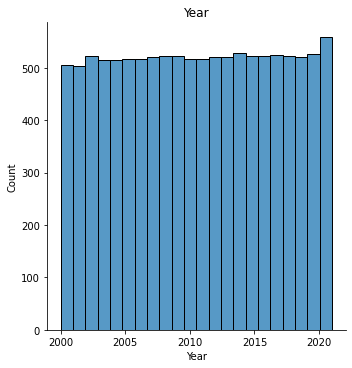

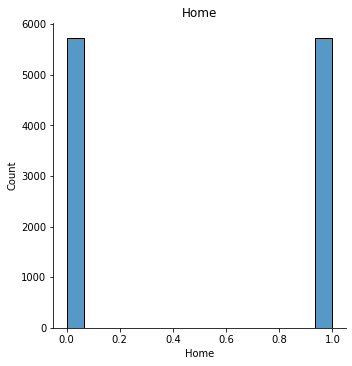

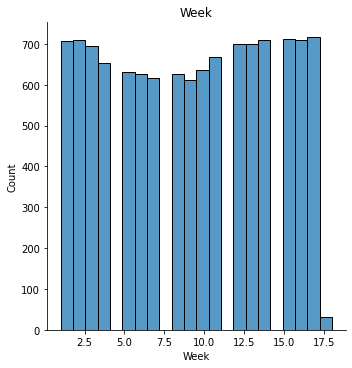

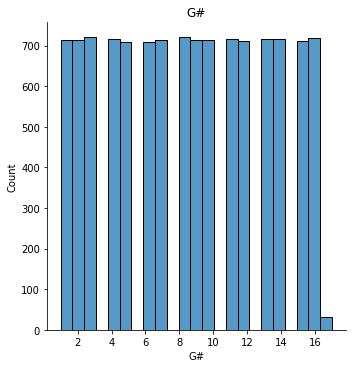

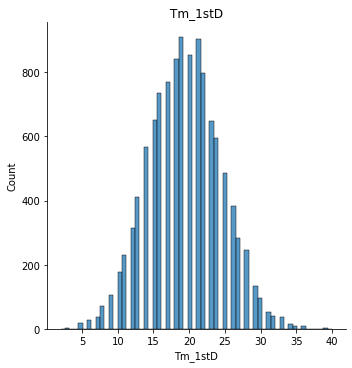

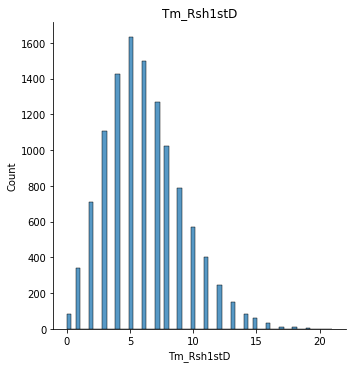

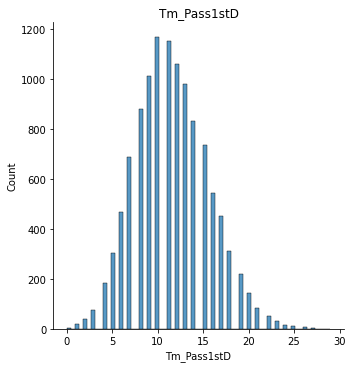

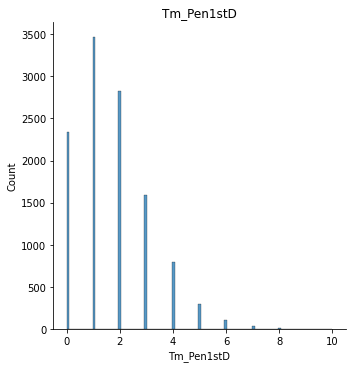

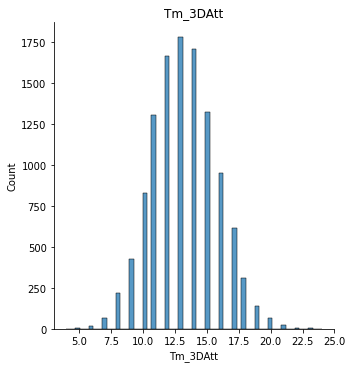

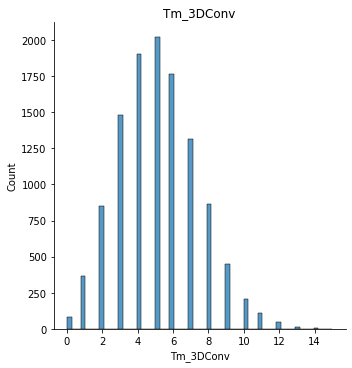

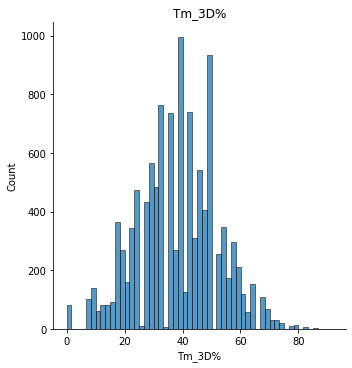

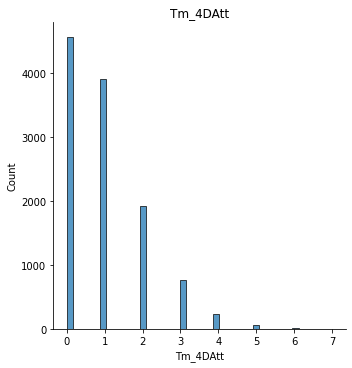

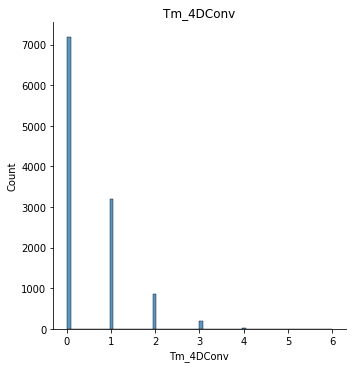

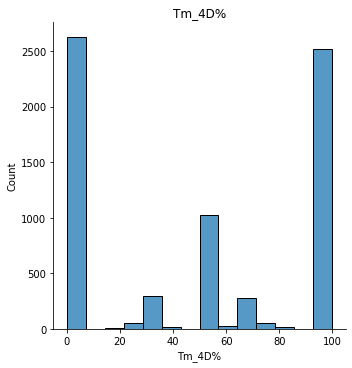

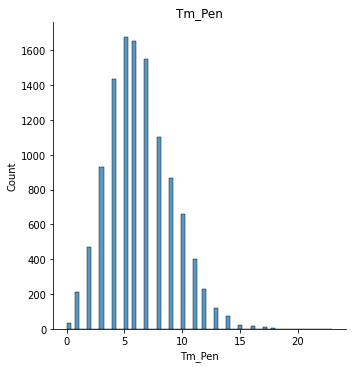

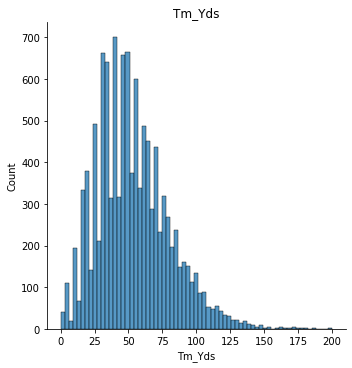

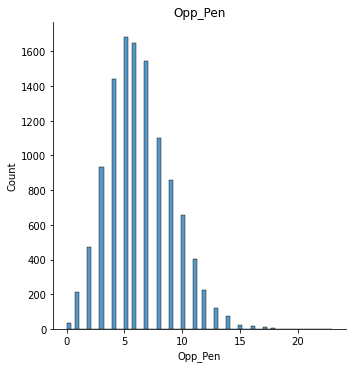

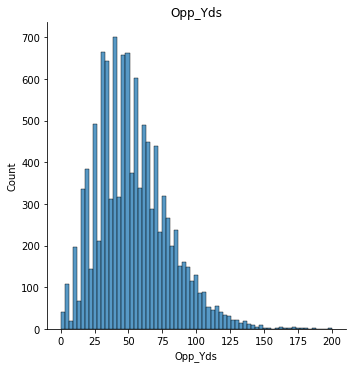

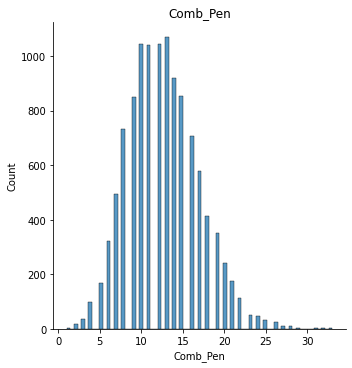

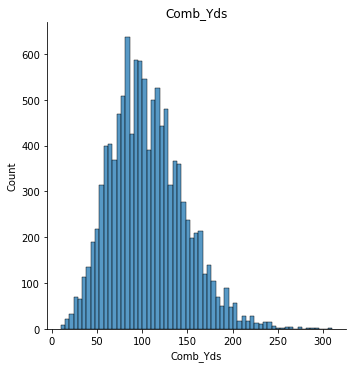

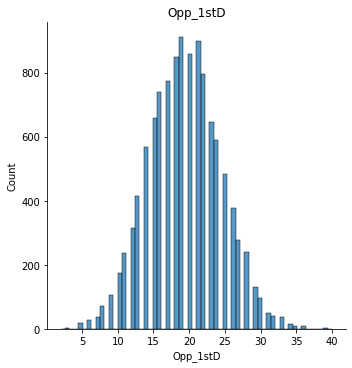

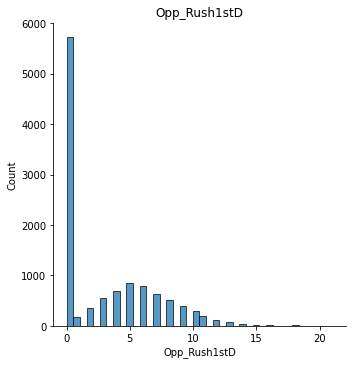

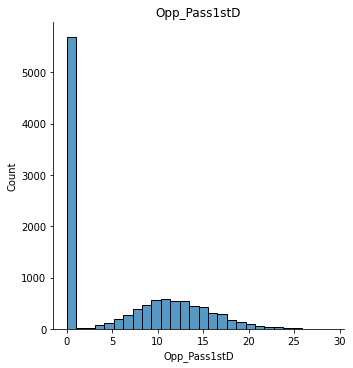

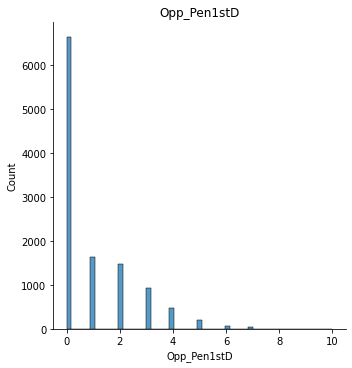

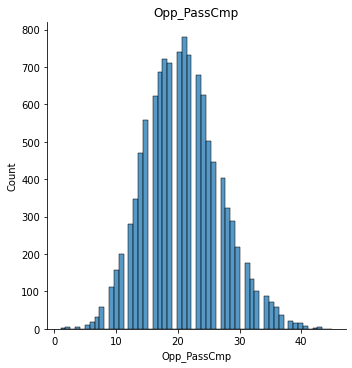

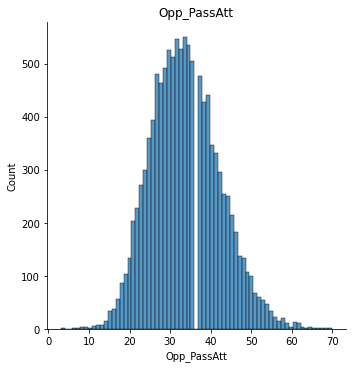

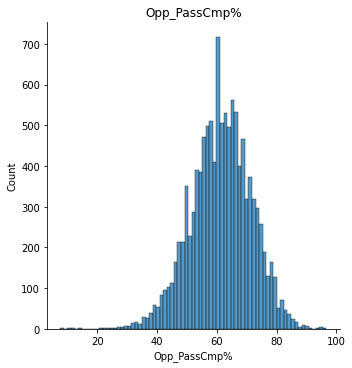

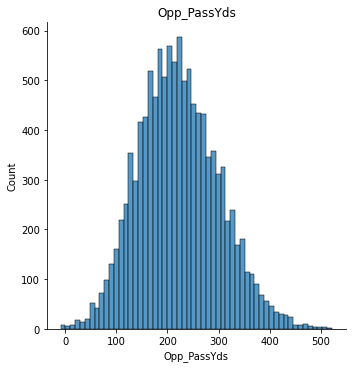

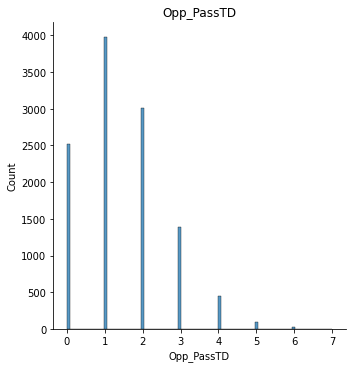

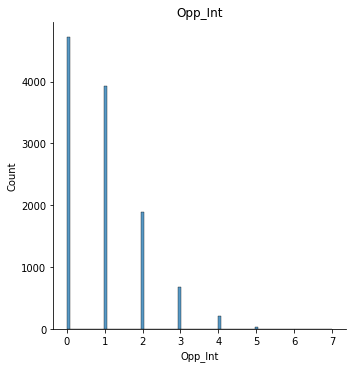

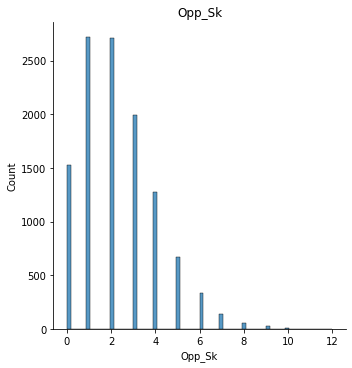

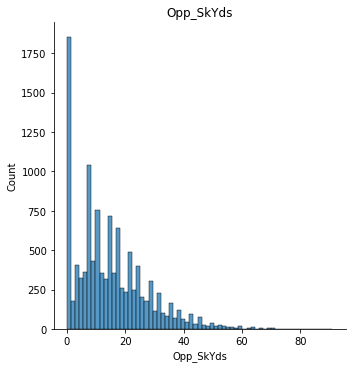

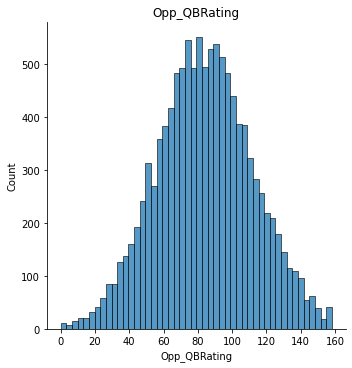

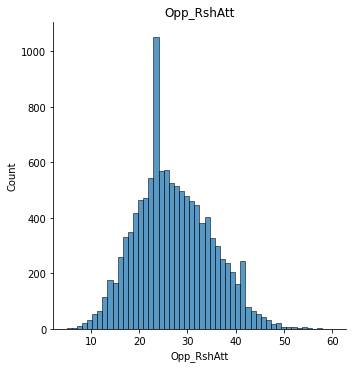

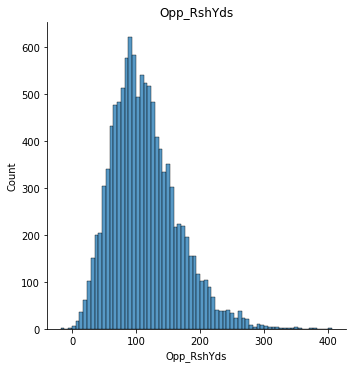

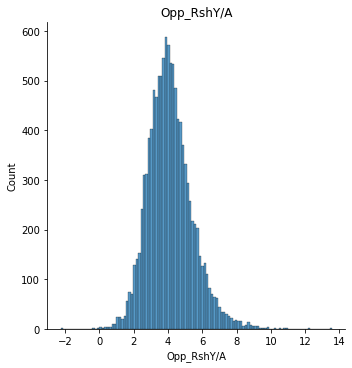

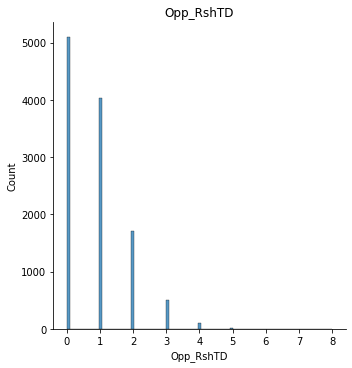

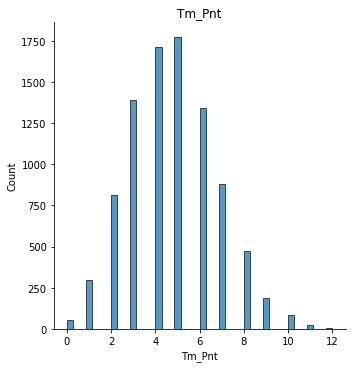

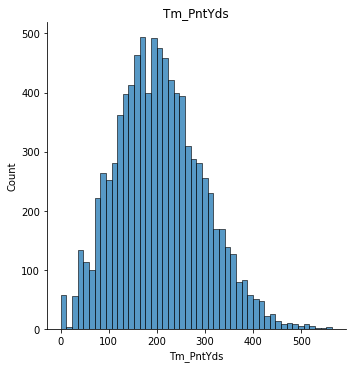

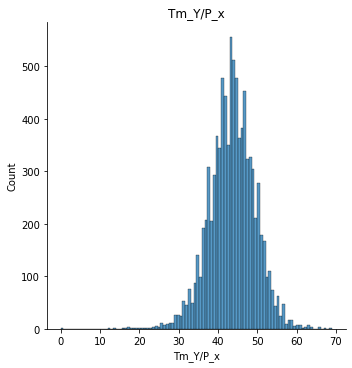

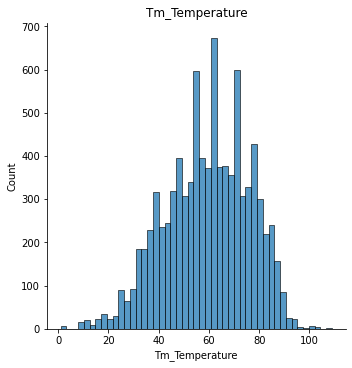

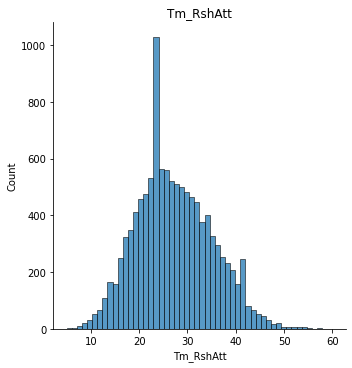

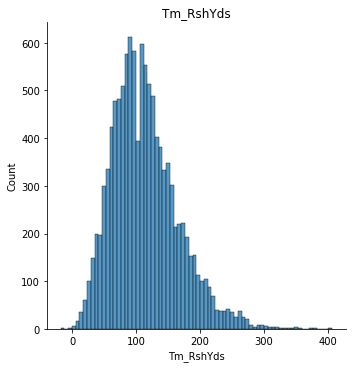

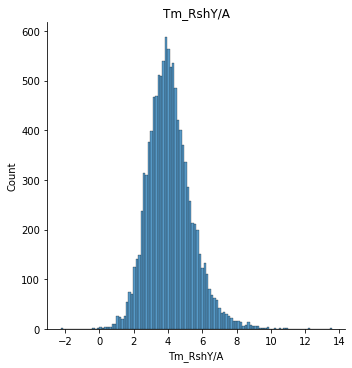

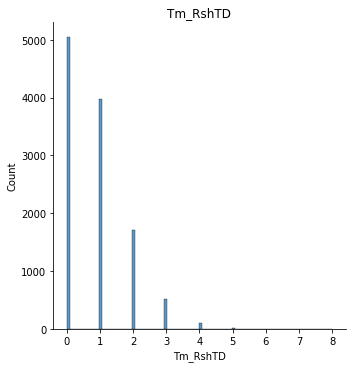

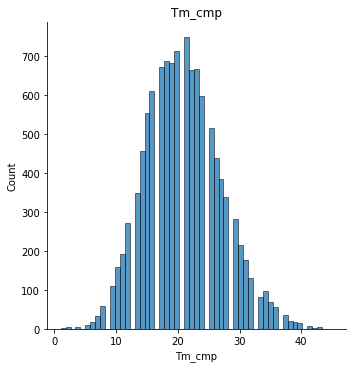

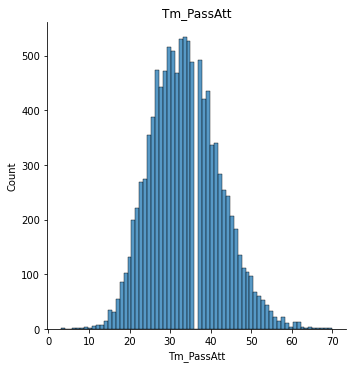

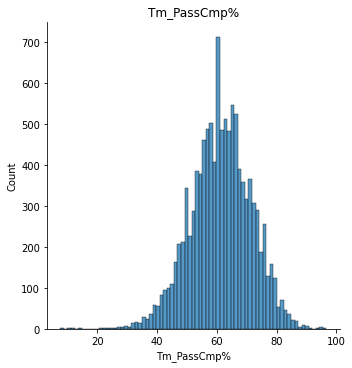

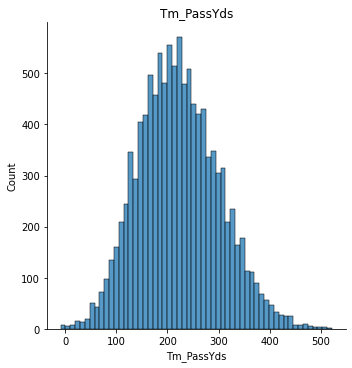

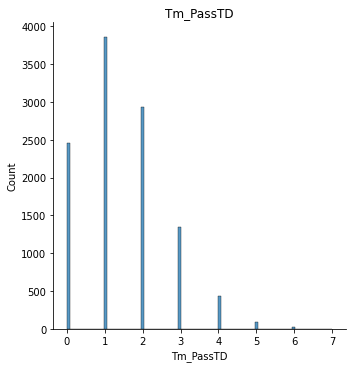

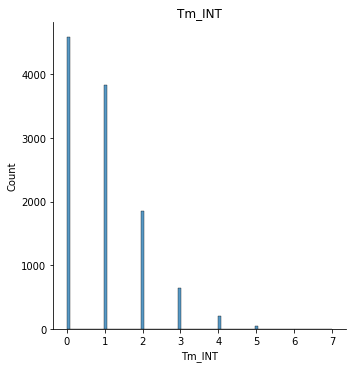

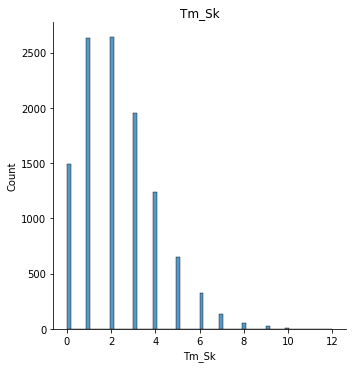

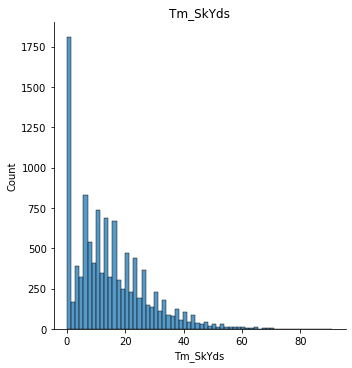

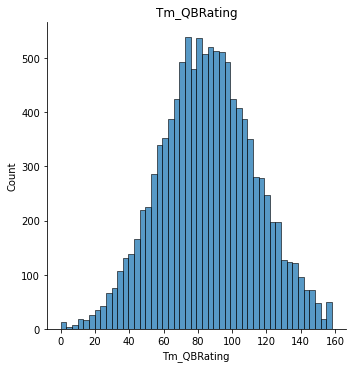

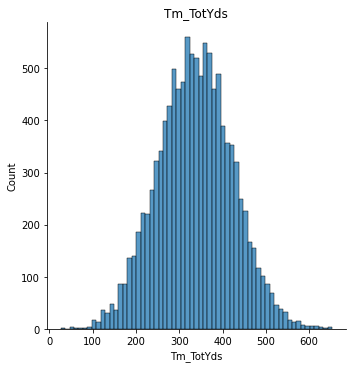

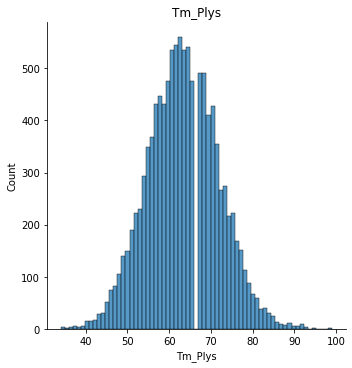

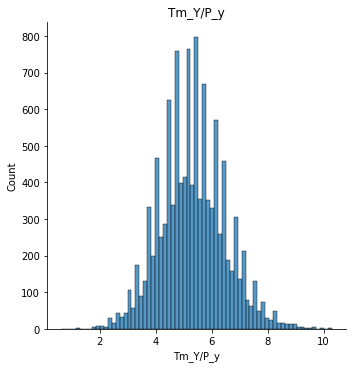

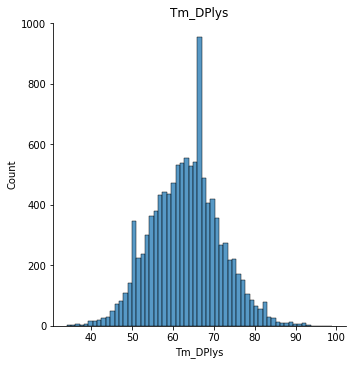

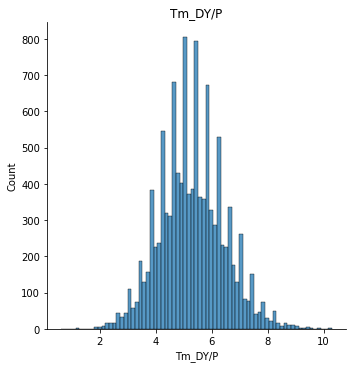

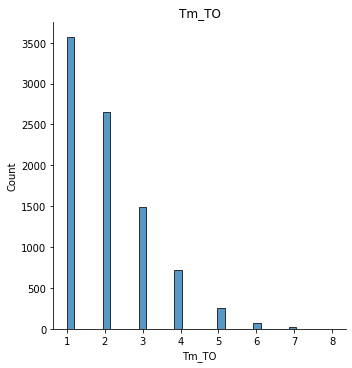

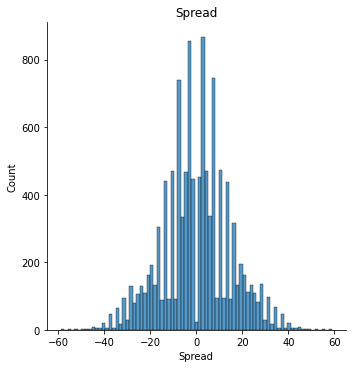

In [32]:
for col in df.columns:
    if df[col].dtype != "object":
        sns.displot(df[col]).set(title=col)

In [55]:
df = df.loc[~df["Tm_QBRating"].isnull()]

In [93]:
x_cols = ["Comb_Yds", "Tm_QBRating", "Opp_QBRating", "Tm_SkYds", "Opp_SkYds"]

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

sf = StandardScaler()
sf.fit(df[x_cols])

X = sm.add_constant(sf.transform(df[x_cols]))
y = df.Spread

model = sm.OLS(y, X)
results = model.fit()

results.params

const   -0.006449
x1       0.012125
x2       7.172904
x3      -7.181248
x4      -2.807358
x5       2.374732
dtype: float64

In [94]:
df.Opp_QBRating.std()

27.84495644870859

In [95]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Spread   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     4459.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:55   Log-Likelihood:                -39882.
No. Observations:               11164   AIC:                         7.978e+04
Df Residuals:                   11158   BIC:                         7.982e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.082     -0.079      0.937      -0.166       0.153
x1             0.0121      0.082      0.148      0.882      -0.148       0.172
x2             7.1729      0.084     85.794      0.000       7.009       7.337
x3            -7.1812      0.085    -84.941      0.000      -7.347      -7.016
x4            -2.8074      0.084    -33.519      0.000      -2.972      -2.643
x5             2.3747      0.085     28.036      0.000       2.209       2.541
==============================================================================
Omnibus:                       51.901   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.832
Skew:                          -0.006   Prob(JB):                     1.53e-16
Kurtosis:                       3.396   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""